In [ ]:
cd drive/MyDrive/datasets

/content/drive/MyDrive/datasets


In [ ]:
! pip install --upgrade pip
! pip install 'dask[complete]'
! pip install auto-ts
! pip install pmdarima
! pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Reading monthly beer production dataset

In [ ]:
data = pd.read_csv('monthly-beer-production-in-austr.csv', index_col=0, parse_dates=True)
data

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
...,...
1995-04-01,127.0
1995-05-01,151.0
1995-06-01,130.0


In [ ]:
data.isna().sum()

Monthly beer production    0
dtype: int64

### Plotting time series data

In [ ]:
import plotly.express as px

mbp = 'Monthly beer production'

fig = px.line(data,x=data.index, y=mbp, title='Slider')
fig.update_layout(
    xaxis=dict(
                rangeselector = dict(
                    buttons = list([
                dict(count=1,label ="1y", step="year",stepmode="backward"),
                dict(count=2,label ="2y", step="year",stepmode="backward"),
                dict(count=3,label ="3y", step="year",stepmode="backward"),
                dict(count=4,label ="4y", step="year",stepmode="backward"),
                  ])
                ),
                rangeslider=dict(
            visible=True
        ),
    ))

### Performing ADF test to check whether the time series is staionary or not

In [ ]:
from statsmodels.tsa.stattools import adfuller

#perform augmented Dickey-Fuller test
out = adfuller(data[mbp])
print('ADF Statistic: {}'.format(out[0]))
print('p-value: {}'.format(out[1]))

ADF Statistic: -2.282661418787577
p-value: 0.17762099829132505


### Plotting pacf and acf to estimate p and q values for AR and MA respectively




/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



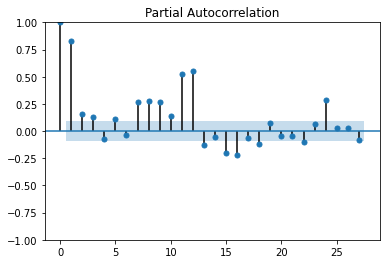

In [ ]:
plot_pacf(data)
plt.show()

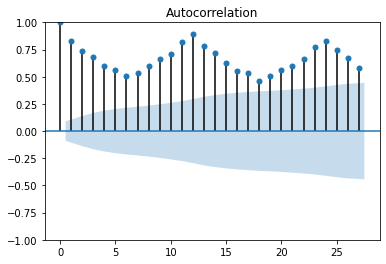

In [ ]:
plot_acf(data)
plt.show()

### Plotting trend, seasonal and residual graphs

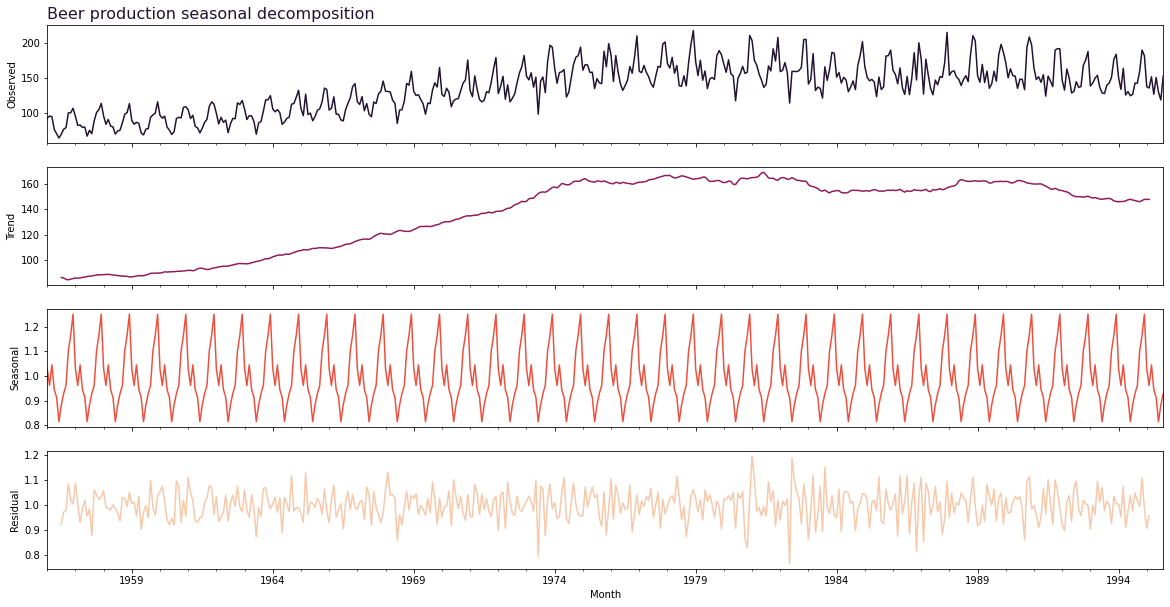

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

sd = seasonal_decompose(x=data['Monthly beer production'], model='multiplicative')
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(20,10))


colours = sb.color_palette('rocket', 10)

sd.observed.plot(ax=axes[0], legend=False, color=colours[0])
axes[0].set_ylabel('Observed')
sd.trend.plot(ax=axes[1], legend=False, color=colours[3])
axes[1].set_ylabel('Trend')
sd.seasonal.plot(ax=axes[2], legend=False, color=colours[6])
axes[2].set_ylabel('Seasonal')
sd.resid.plot(ax=axes[3], legend=False, color=colours[9])
axes[3].set_ylabel('Residual')
axes[0].set_title('Beer production seasonal decomposition', loc='left', fontsize=16, color=colours[0])
plt.show()

### Splitting the data into train and test splits

In [ ]:
train_set = data[:'1990']
test_set = data['1991':]
test_set

,Monthly beer production
Month,
1991-01-01,164.4
1991-02-01,148.1
1991-03-01,152.0
1991-04-01,144.1
1991-05-01,155.0
1991-06-01,124.5
1991-07-01,153.0
1991-08-01,146.0
1991-09-01,138.0


### Using Auto ARIMA to get the coefficients for SARIMAX with the lowest BIC score 

In [ ]:
import pmdarima as pm

model = pm.auto_arima(train_set, m = 12, seasonal = True, start_p = 0, 
                      start_q = 0, max_order = 4, test = 'adf',information_criterion='bic', 
                      error_action = 'ignore', suppress_warnings = True,
                      stepwise = True, trace = True)

Performing stepwise search to minimize bic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=3341.483, Time=1.23 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=4185.921, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=inf, Time=0.76 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=3716.007, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=5343.512, Time=0.01 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=3855.964, Time=0.38 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=inf, Time=0.67 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : BIC=inf, Time=2.59 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : BIC=3356.755, Time=3.02 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : BIC=3688.448, Time=1.53 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : BIC=inf, Time=3.26 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : BIC=inf, Time=3.74 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=3344.920, Time=1.29 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : BIC=3345.400, Time=1.51 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : BIC=i

In [ ]:
print(model.summary())

                                 SARIMAX Results                                  
Dep. Variable:                          y   No. Observations:                  420
Model:             SARIMAX(1, 0, [1], 12)   Log Likelihood               -1658.661
Date:                    Mon, 13 Jun 2022   AIC                           3325.322
Time:                            14:31:31   BIC                           3341.483
Sample:                                 0   HQIC                          3331.710
                                    - 420                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.0851      1.384      2.952      0.003       1.373       6.797
ar.S.L12       0.9670      0.011     88.946      0.000       0.946       0.988
ma.S.L12      -0.269

### Forecasting beer production for test period

In [ ]:
forecast = model.predict(n_periods = test_set.shape[0], return_conf_int= True)

In [ ]:
forecast_df = pd.DataFrame(data = forecast[0], index = test_set.index, columns = ['Prediction'])
confidence_df = pd.DataFrame(data = forecast[1], index = test_set.index, columns = ['Confidence_lo','Confidence_up'])

In [ ]:
f = pd.concat([data,forecast_df,confidence_df], axis = 1)

In [ ]:
import plotly.express as px

fig = px.line(f,x=f.index, y=[mbp,'Prediction'], title='Beer prediction data')
fig.update_layout(
    xaxis=dict(
                rangeselector = dict(
                    buttons = list([
                dict(count=1,label ="1y", step="year",stepmode="backward"),
                dict(count=2,label ="2y", step="year",stepmode="backward"),
                dict(count=3,label ="3y", step="year",stepmode="backward"),
                dict(count=4,label ="4y", step="year",stepmode="backward"),
                  ])
                ),
                rangeslider=dict(
            visible=True
        ),
    ))

### Using best coefficients from Auto ARIMA model for rolling forecast prediction

In [ ]:
from datetime import timedelta
from statsmodels.tsa.statespace.sarimax import SARIMAX

rolling_predictions = test_set.copy()
for train_end in test_set.index:
    train_data = data[:train_end-timedelta(days=1)]
    model=SARIMAX(train_data,order=(0, 0, 0),seasonal_order=(1,0,1,12))
    results=model.fit()
    pred = results.forecast()
    # print(pred.values,train_end)
    rolling_predictions[train_end] = pred



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided,

In [ ]:
r_p_d = pd.Series(np.diag(rolling_predictions.drop(mbp, axis = 1)), index = test_set.index)

pred2 = results.get_forecast('2000-12-01')
pred2_ci = pred2.conf_int()
pred_mean = pred2.predicted_mean['1995-09-01':'2000']

fore_df = pd.DataFrame(data = r_p_d, index = test_set.index, columns = ['Prediction'])
rf = pd.concat([data,fore_df,pred_mean], axis = 1)

### Forecasting future predictions 

In [ ]:
import plotly.express as px

fig = px.line(rf,x=rf.index, y=[mbp,'Prediction','predicted_mean'], title='Beer prediction data')
fig.update_layout(
    xaxis=dict(
                rangeselector = dict(
                    buttons = list([
                dict(count=1,label ="1y", step="year",stepmode="backward"),
                dict(count=2,label ="2y", step="year",stepmode="backward"),
                dict(count=3,label ="3y", step="year",stepmode="backward"),
                dict(count=4,label ="4y", step="year",stepmode="backward"),
                  ])
                ),
                rangeslider=dict(
            visible=True
        ),
    ))

### Using auto time series in hopes to get a better model 

In [ ]:
from auto_ts import auto_timeseries

model = auto_timeseries(forecast_period=12,
                        score_type='rmse', time_interval='M',
                        model_type='best',seasonality = True)

Imported auto_timeseries version:0.0.64. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



Start of Fit.....
    Target variable given as = Monthly beer production
Start of loading of data.....
    Inputs: ts_column = Month, sep = ,, target = ['Monthly beer production']
    Using given input: pandas dataframe...
    train time series Month column is the index on test data...
    train data shape = (420, 1)
Alert: Could not detect strf_time_format of Month. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model
No time series plot since verbose = 0. Continuing
Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
  Starting Prophet Fit
       Adding monthly seasonality to Prophet with period=12, fourier_order=12 and prior_scale=0.10
  Starting Prophet Cross Validatio

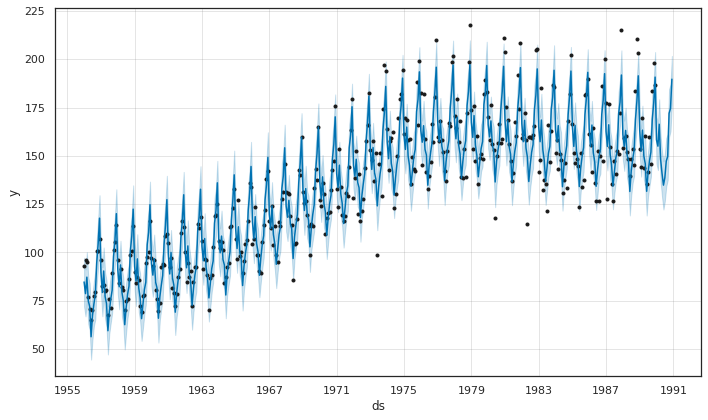

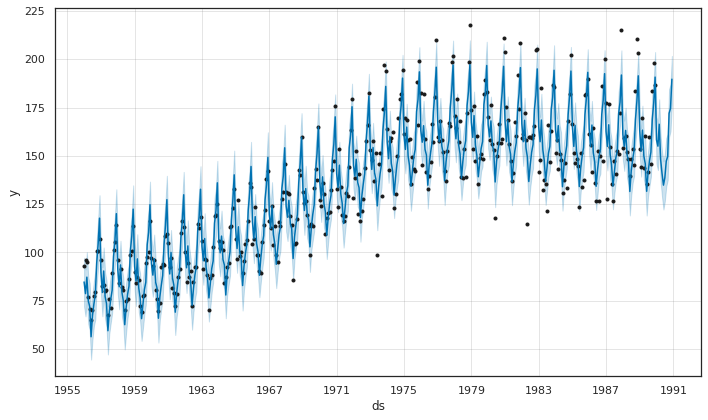

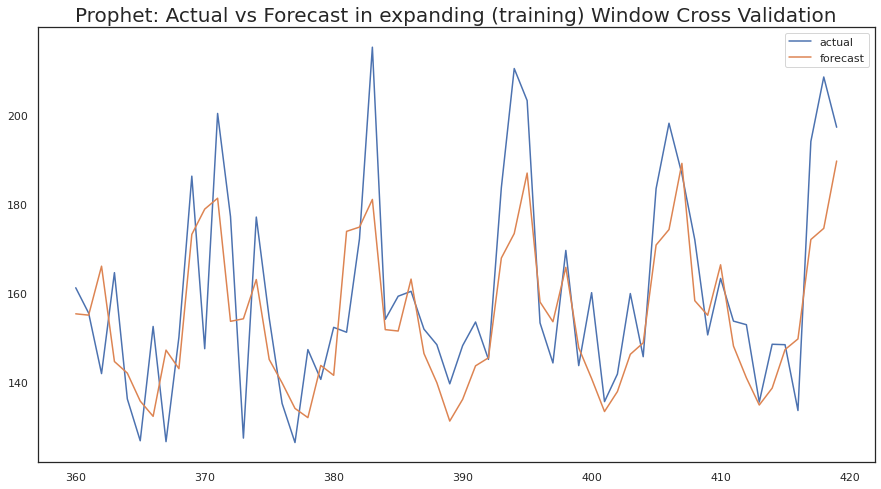

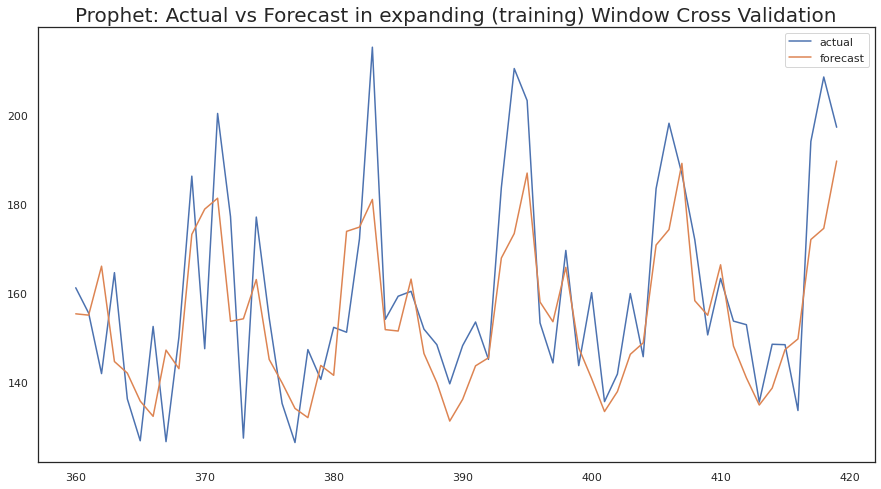

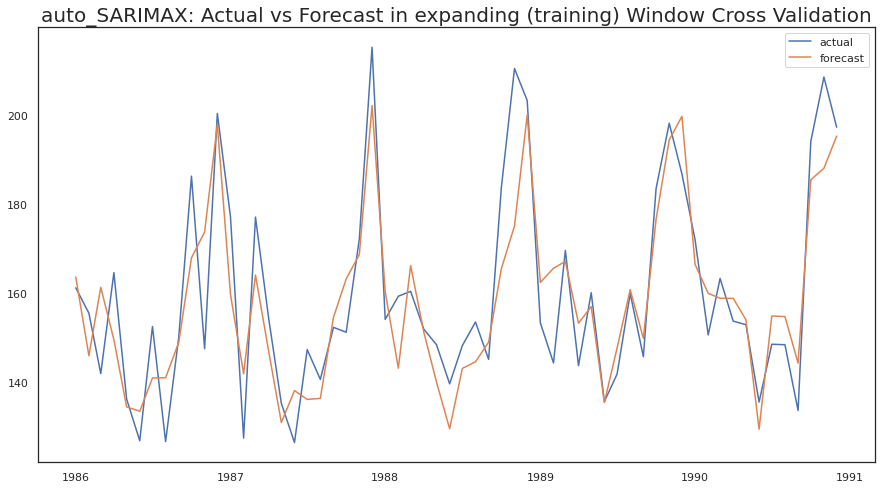

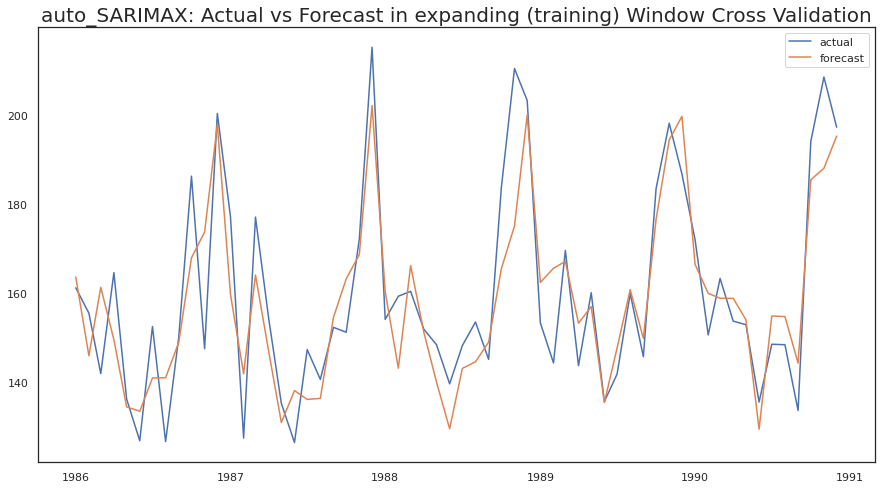

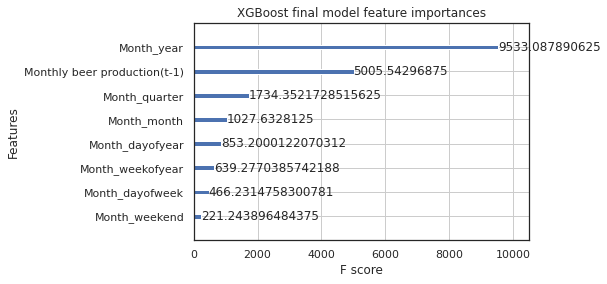

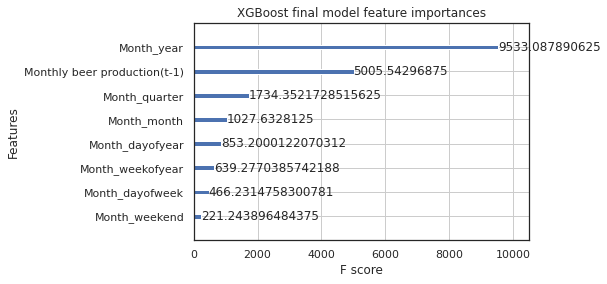

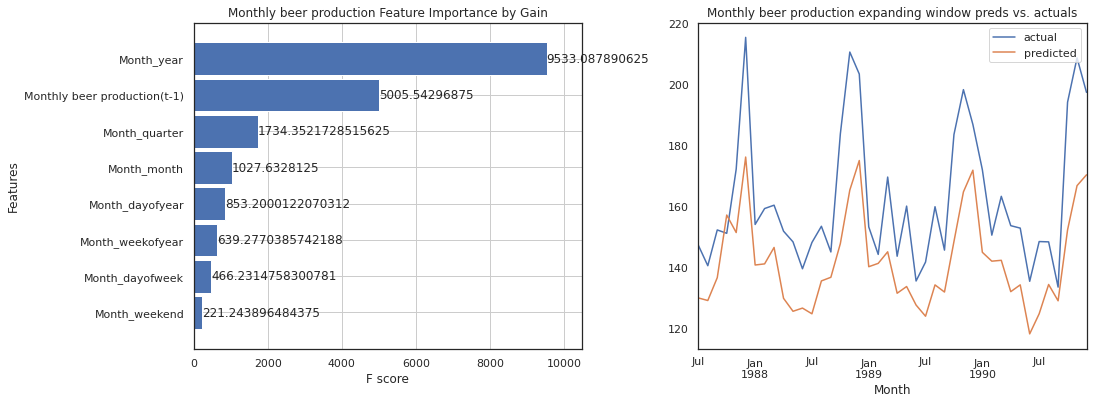

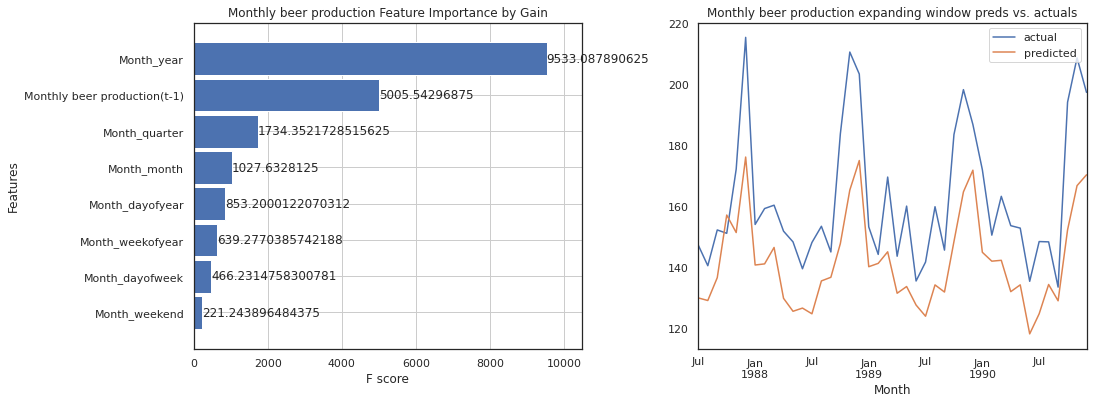

In [ ]:
model.fit(traindata= train_set, 
          ts_column="Month",
          target=mbp)